Instructor Led Lab

Lewis Hughes 
Intro to Python
4/28/25

In [ ]:
#Importing Libraries
!pip install matplotlib seaborn scipy

In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
from scipy import stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Loading Datasets

In [18]:
personnel_df = pd.read_csv("data/CaliforniaHospitalData_Personnel.txt")
personnel_df = pd.read_csv("data/CaliforniaHospitalData_Personnel.txt", delimiter="\t")

Merging Datasets

In [19]:
merged_df = pd.merge(hospital_df, personnel_df, on="HospitalID", how="inner")

In [24]:
print(merged_df.head())

   HospitalID                              Name         Zip  \
0       45740                  Mammoth Hospital  93546-0660   
1       12145  Victor Valley Community Hospital       92392   
2       25667        Pioneers Memorial Hospital       92227   
3       46996      Ridgecrest Regional Hospital       93555   
4       37393        Barstow Community Hospital       92311   

                   Website TypeControl     Teaching DonorType  NoFTE  \
0  www.mammothhospital.com    District  Small/Rural   Charity  327.0   
1             www.vvch.org  Non Profit  Small/Rural   Charity  345.0   
2             www.pmhd.org    District  Small/Rural   Charity  601.2   
3              www.rrh.org  Non Profit  Small/Rural   Charity  400.0   
4  www.barstowhospital.com    Investor  Small/Rural   Charity  262.0   

     NetPatRev    InOperExp  ...   LastName  FirstName  Gender  PositionID  \
0  135520.2186  20523425.53  ...        Web      David       M           4   
1  136156.6913  33447542.78  ...

Drop Columns

In [25]:
merged_df.drop(columns=["Work_ID", "PositionID", "Website"], inplace=True)

print(merged_df.head())

   HospitalID                              Name         Zip TypeControl  \
0       45740                  Mammoth Hospital  93546-0660    District   
1       12145  Victor Valley Community Hospital       92392  Non Profit   
2       25667        Pioneers Memorial Hospital       92227    District   
3       46996      Ridgecrest Regional Hospital       93555  Non Profit   
4       37393        Barstow Community Hospital       92311    Investor   

      Teaching DonorType  NoFTE    NetPatRev    InOperExp   OutOperExp  ...  \
0  Small/Rural   Charity  327.0  135520.2186  20523425.53  34916220.47  ...   
1  Small/Rural   Charity  345.0  136156.6913  33447542.78  20348596.22  ...   
2  Small/Rural   Charity  601.2  197094.2541  37254178.67  37832448.33  ...   
3  Small/Rural   Charity  400.0  139170.3798  23385570.10  24661355.90  ...   
4  Small/Rural   Charity  262.0  116797.8306  13684502.49  15159986.51  ...   

   AvlBeds   LastName  FirstName Gender             PositionTitle  \
0    

Adding Myself to the Data

In [27]:
new_record = {
    "HospitalID": merged_df.iloc[0]["HospitalID"],  # Picking the first hospital
    "Name": merged_df.iloc[0]["Name"],
    "Zip": merged_df.iloc[0]["Zip"],
    "TypeControl": merged_df.iloc[0]["TypeControl"],
    "Teaching": merged_df.iloc[0]["Teaching"],
    "DonorType": merged_df.iloc[0]["DonorType"],
    "NoFTE": merged_df.iloc[0]["NoFTE"],
    "NetPatRev": merged_df.iloc[0]["NetPatRev"],
    "InOperExp": merged_df.iloc[0]["InOperExp"],
    "OutOperExp": merged_df.iloc[0]["OutOperExp"],
    "OperRev": merged_df.iloc[0]["OperRev"],
    "OperInc": merged_df.iloc[0]["OperInc"],
    "AvlBeds": merged_df.iloc[0]["AvlBeds"],
    "LastName": "Hughes",
    "FirstName": "Lewis",
    "Gender": "Male",
    "PositionTitle": "State Board Representative",
    "Compensation": 89473,
    "MaxTerm": 3,
    "StartDate": datetime.date.today()
}

merged_df = pd.concat([merged_df, pd.DataFrame([new_record])], ignore_index=True)

In [28]:
#Displaying my Position

print(merged_df[(merged_df['FirstName'] == 'Lewis') & (merged_df['LastName'] == 'Hughes')])

    HospitalID              Name         Zip TypeControl     Teaching  \
61       45740  Mammoth Hospital  93546-0660    District  Small/Rural   

   DonorType  NoFTE    NetPatRev    InOperExp   OutOperExp  ...  AvlBeds  \
61   Charity  327.0  135520.2186  20523425.53  34916220.47  ...       15   

    LastName  FirstName Gender               PositionTitle Compensation  \
61    Hughes      Lewis   Male  State Board Representative        89473   

   MaxTerm   StartDate  Phone Email  
61       3  2025-04-28    NaN   NaN  

[1 rows x 22 columns]


Converting Date-Time Columns

In [29]:
merged_df["StartDate"] = pd.to_datetime(merged_df["StartDate"], errors='coerce')

categorical_vars = ["TypeControl", "Teaching", "DonorType", "Gender"]
for var in categorical_vars:
    merged_df[var] = merged_df[var].astype("category")

In [30]:
# Display data types to confirm changes
print("\nData Types After Conversion:")
print(merged_df.dtypes)


Data Types After Conversion:
HospitalID                int64
Name                     object
Zip                      object
TypeControl            category
Teaching               category
DonorType              category
NoFTE                   float64
NetPatRev               float64
InOperExp               float64
OutOperExp              float64
OperRev                   int64
OperInc                   int64
AvlBeds                   int64
LastName                 object
FirstName                object
Gender                 category
PositionTitle            object
Compensation              int64
MaxTerm                   int64
StartDate        datetime64[ns]
Phone                    object
Email                    object
dtype: object


Descriptive Statistics

Numeric variables

In [31]:
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
print("\nNumeric Summary:")
print(merged_df[numeric_cols].agg(["mean", "median", "min", "max"]))


Numeric Summary:
         HospitalID    NoFTE     NetPatRev     InOperExp    OutOperExp  \
mean    32052.83871  1333.76  6.609696e+05  1.639198e+08  8.926709e+07   
median  33267.00000   368.66  1.670720e+05  3.124469e+07  3.491622e+07   
min     10767.00000    55.00  1.417224e+04  1.436471e+06  3.787718e+06   
max     46996.00000  8000.00  4.662582e+06  1.285631e+09  6.621559e+08   

             OperRev       OperInc     AvlBeds   Compensation   MaxTerm  
mean    2.529453e+08 -2.416488e+05  191.629032   92721.467742  4.225806  
median  6.153388e+07  1.464124e+06   99.000000   46978.000000  4.000000  
min     5.235317e+06 -3.211633e+08   12.000000   23987.000000  2.000000  
max     1.912179e+09  1.648724e+08  909.000000  248904.000000  8.000000  


Text variables

In [32]:
text_cols = merged_df.select_dtypes(include=["object"]).columns
print("\nText Variables Summary:")
for col in text_cols:
    print(f"{col} - Unique values: {merged_df[col].nunique()}")


Text Variables Summary:
Name - Unique values: 61
Zip - Unique values: 61
LastName - Unique values: 24
FirstName - Unique values: 20
PositionTitle - Unique values: 4
Phone - Unique values: 24
Email - Unique values: 24


Categorical variable

In [33]:
print("\nCategorical Variables Summary:")
for col in categorical_vars:
    print(f"{col} - Value Counts:\n{merged_df[col].value_counts()}\n")


Categorical Variables Summary:
TypeControl - Value Counts:
TypeControl
Non Profit     37
District       15
City/County     7
Investor        3
Name: count, dtype: int64

Teaching - Value Counts:
Teaching
Small/Rural    45
Teaching       17
Name: count, dtype: int64

DonorType - Value Counts:
DonorType
Charity    45
Alumni     17
Name: count, dtype: int64

Gender - Value Counts:
Gender
F       32
M       29
Male     1
Name: count, dtype: int64



Visualizations

Histograms

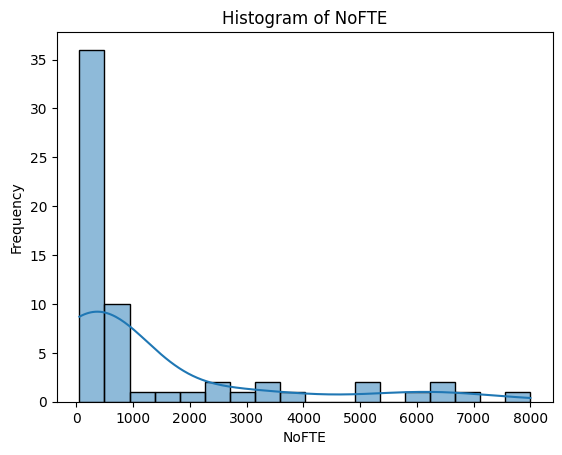

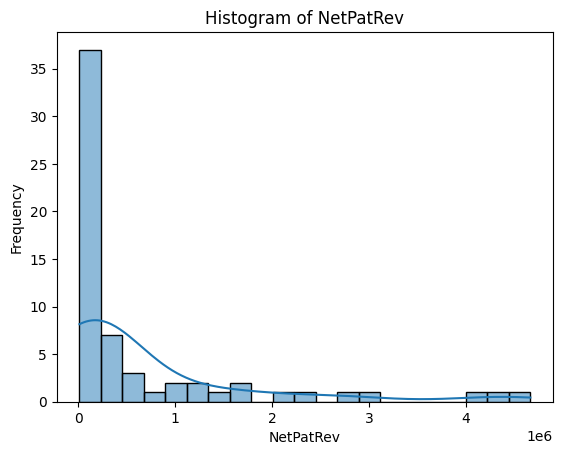

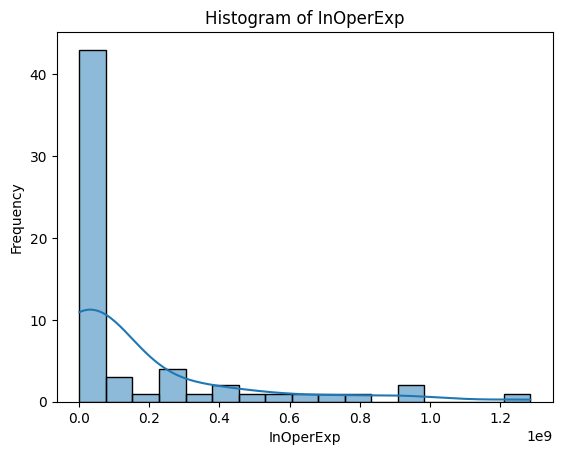

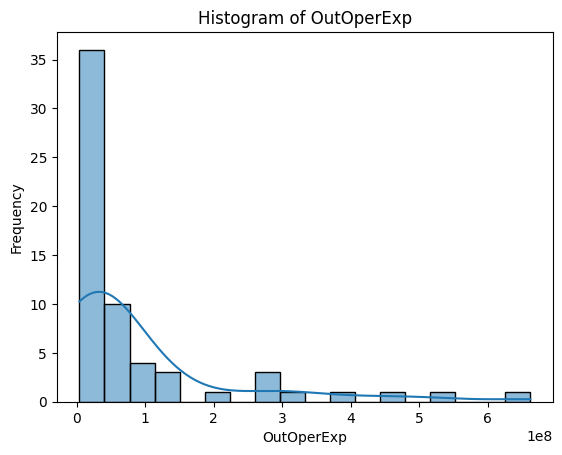

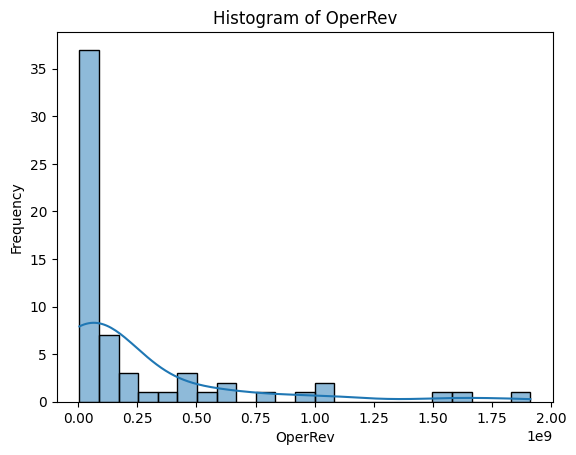

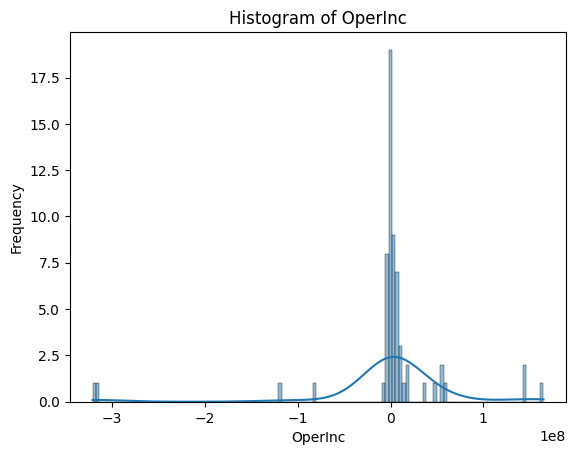

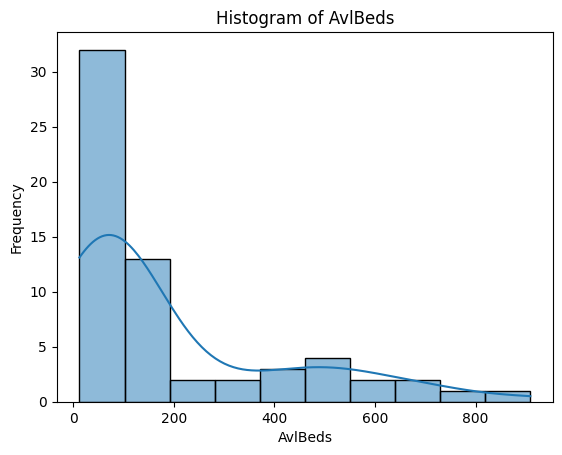

In [38]:
hist_vars = ["NoFTE", "NetPatRev", "InOperExp", "OutOperExp", "OperRev", "OperInc", "AvlBeds"]
for var in hist_vars:
    plt.figure()
    sns.histplot(merged_df[var], kde=True)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

Scatterplots

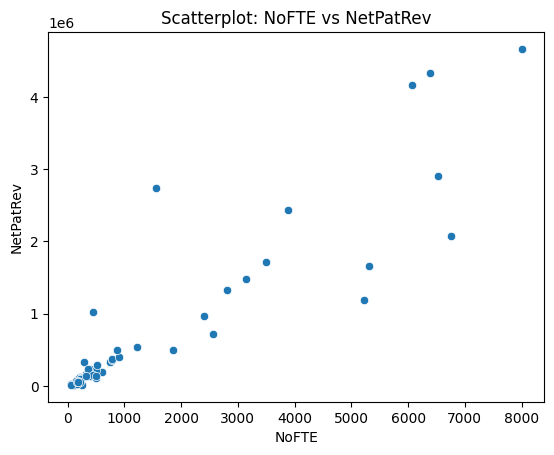

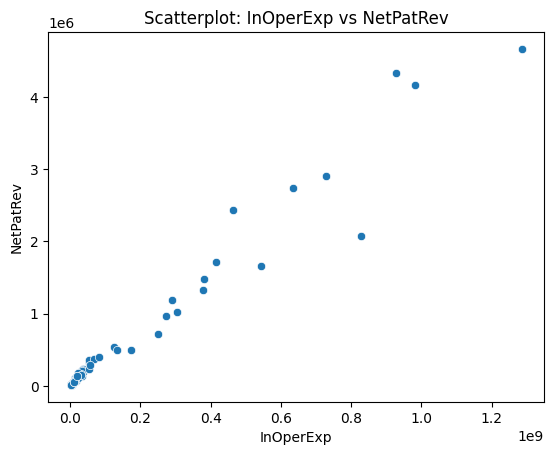

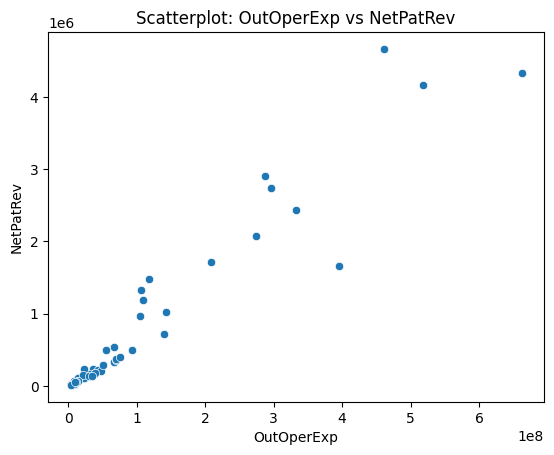

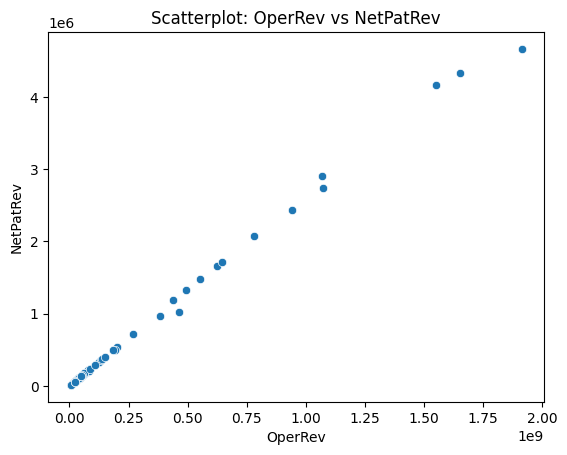

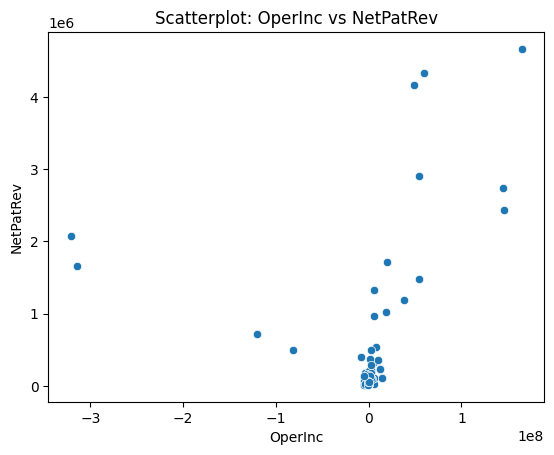

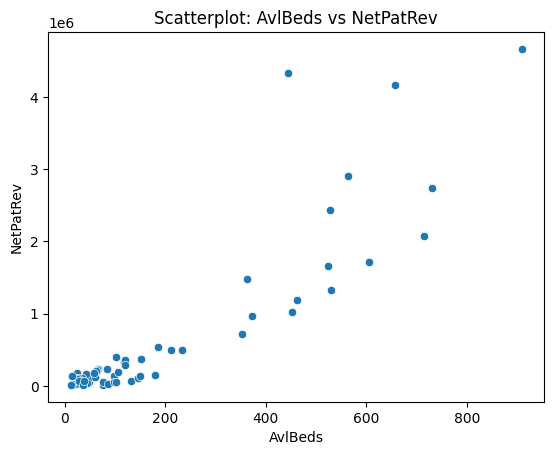

In [39]:
target = "NetPatRev"
for var in ["NoFTE", "InOperExp", "OutOperExp", "OperRev", "OperInc", "AvlBeds"]:
    plt.figure()
    sns.scatterplot(x=merged_df[var], y=merged_df[target])
    plt.title(f"Scatterplot: {var} vs {target}")
    plt.xlabel(var)
    plt.ylabel(target)
    plt.show()

Boxplots

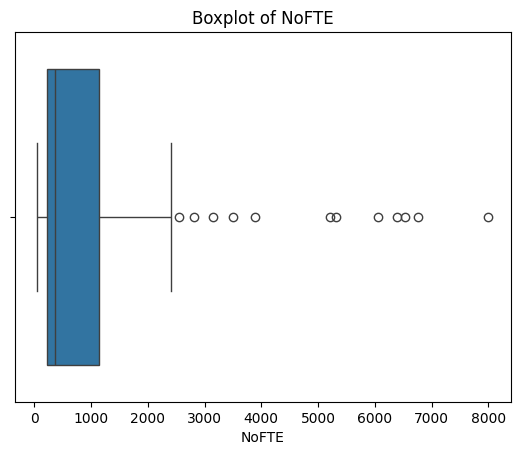

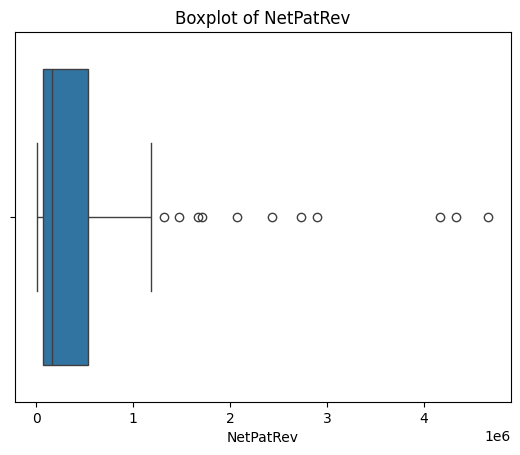

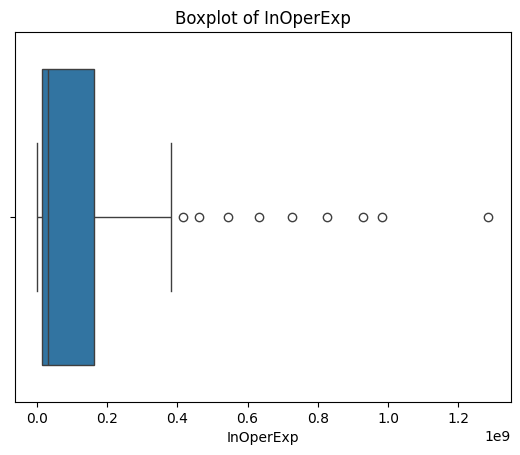

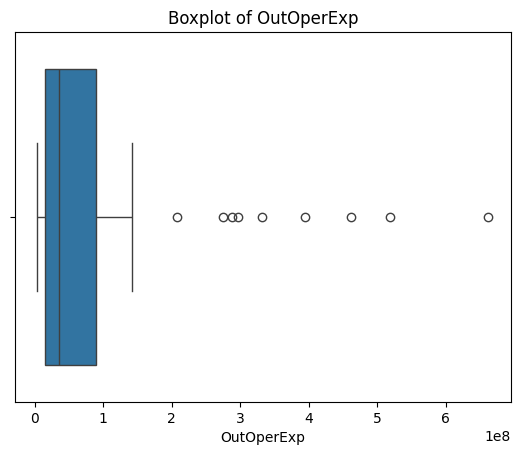

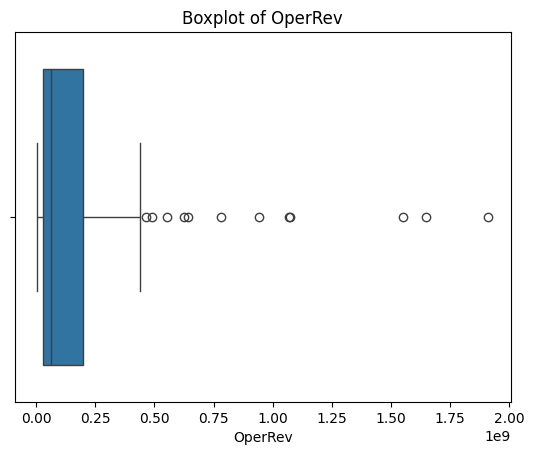

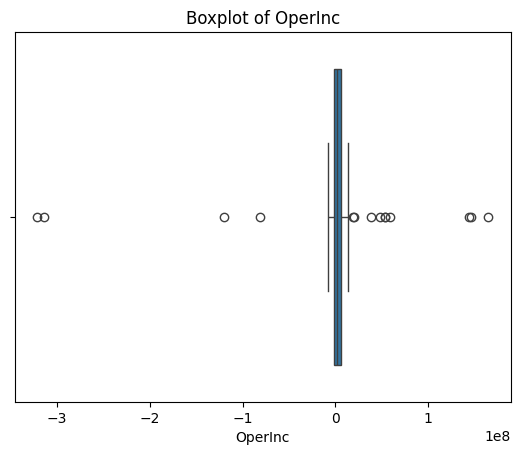

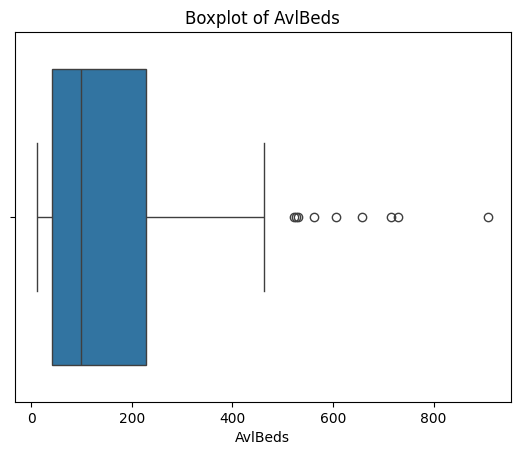

In [40]:
for var in hist_vars:
    plt.figure()
    sns.boxplot(x=merged_df[var])
    plt.title(f"Boxplot of {var}")
    plt.show()

QQ plots and Shapiro-Wilk Test

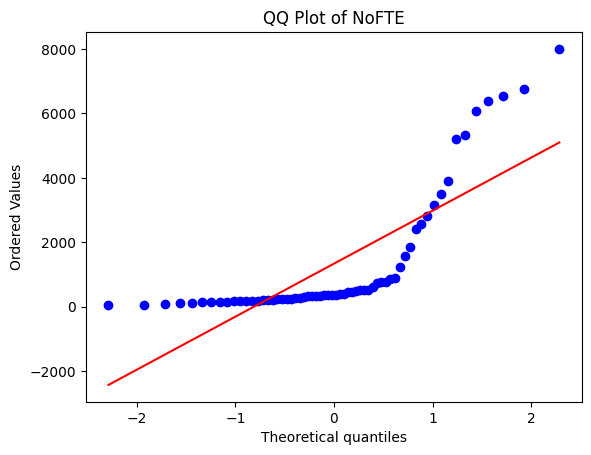

Shapiro-Wilk Test for NoFTE: stat=0.6402, p=0.0000
Data does NOT look normally distributed (Reject H0)


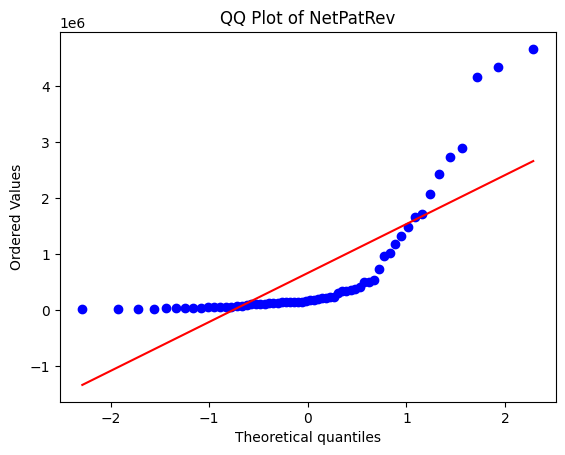

Shapiro-Wilk Test for NetPatRev: stat=0.6187, p=0.0000
Data does NOT look normally distributed (Reject H0)


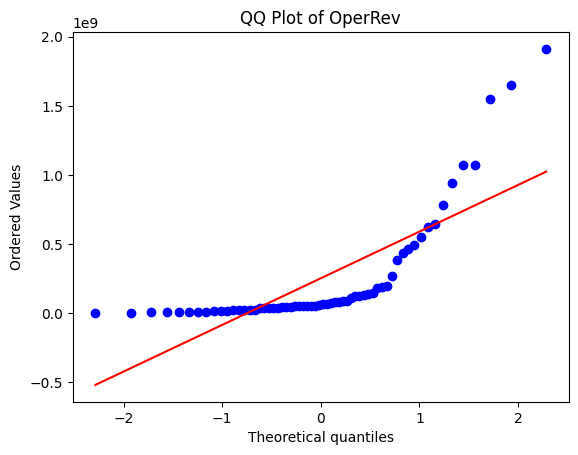

Shapiro-Wilk Test for OperRev: stat=0.6164, p=0.0000
Data does NOT look normally distributed (Reject H0)


In [41]:
qq_vars = ["NoFTE", "NetPatRev", "OperRev"]
for var in qq_vars:
    plt.figure()
    stats.probplot(merged_df[var].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ Plot of {var}")
    plt.show()
    
    stat, p = stats.shapiro(merged_df[var].dropna())
    print(f"Shapiro-Wilk Test for {var}: stat={stat:.4f}, p={p:.4f}")
    if p > 0.05:
        print("Data looks normally distributed (Fail to reject H0)")
    else:
        print("Data does NOT look normally distributed (Reject H0)")